In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime
data_csv = pd.read_csv("KTM_WEATHER_DATA.csv")

def str_to_date(str_date):
    dates, time = str_date.split('T') 
    time = time[0:2] + ':' + time[2:] + ':00'
    dates = dates[-2:]+'/'+dates[-4:-2]+'/'+dates[2:4]
    datestime = dates + ' ' + time
    return (datetime.strptime(datestime, '%d/%m/%y %H:%M:%S'))

year = []
month = []
day = []
time = []
for i in data_csv['timestamp']:
    year.append(str_to_date(i).year)
    month.append(str_to_date(i).month)
    day.append(str_to_date(i).day)
    time.append(str_to_date(i).time())
data_csv.insert(column = 'Time', value=time, loc =1)
data_csv.insert(column = 'Day', value=day, loc =1)
data_csv.insert(column = 'Month', value=month, loc =1)
data_csv.insert(column = 'Year', value=year, loc =1)
time_temp_data = np.array(data_csv[['Day','Time','Temperature']])

[208 206 203 199 202 201 208 208 210 214 241 229 237 239 232 223 222 227
 216 210 210 210 209 209]


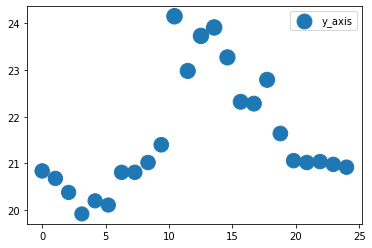

In [19]:
days = list(set(time_temp_data[:,0]))
time_temp = {}
x_axis = np.linspace(0,24,24)
# np.linspace(np.average(time_temp_data[time_temp_data[:,0]==day][:,2]),np.average(time_temp_data[time_temp_data[:,0]==day][:,2]),24)
day = 16  
time_temp[day] = time_temp_data[time_temp_data[:,0]==day]
lbl = 'Day-'+ str(day)
y_axis = time_temp[day][:,2]

data = {
    'x_axis': x_axis,
    'y_axis': y_axis,
}

data['size'] = np.array(np.floor(data['y_axis']*10), dtype='int64')
print(data['size'])
plt.scatter('x_axis', 'y_axis', s='size', data=data)
plt.legend()
plt.show()

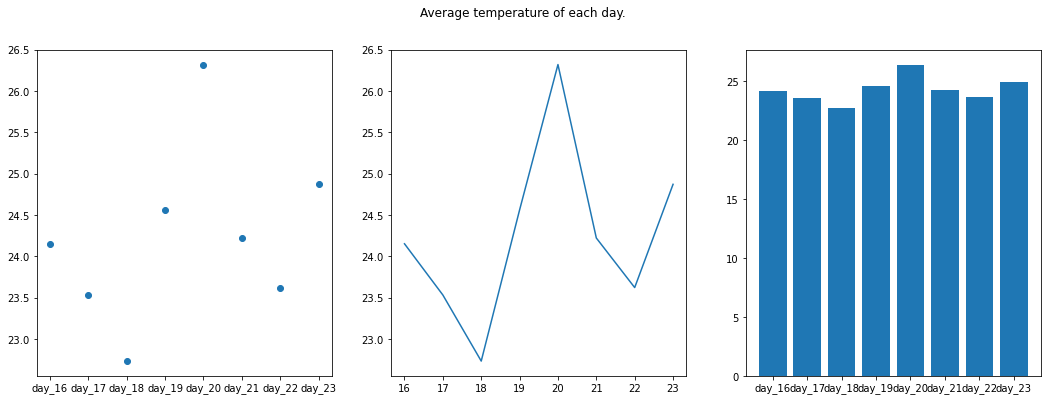

In [36]:
days = list(set(time_temp_data[:,0]))
avg = []
values = []
for day in days:
    avg.append(np.max(np.array(time_temp_data[time_temp_data[:,0]==day][:,2], dtype='float64')))
    values.append('day_'+str(day))
    
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.scatter(values, avg)
plt.subplot(1,3,2)
plt.plot(days, avg)
plt.subplot(1,3,3)
plt.bar(values, avg)
plt.suptitle('Average temperature of each day.')
plt.show()

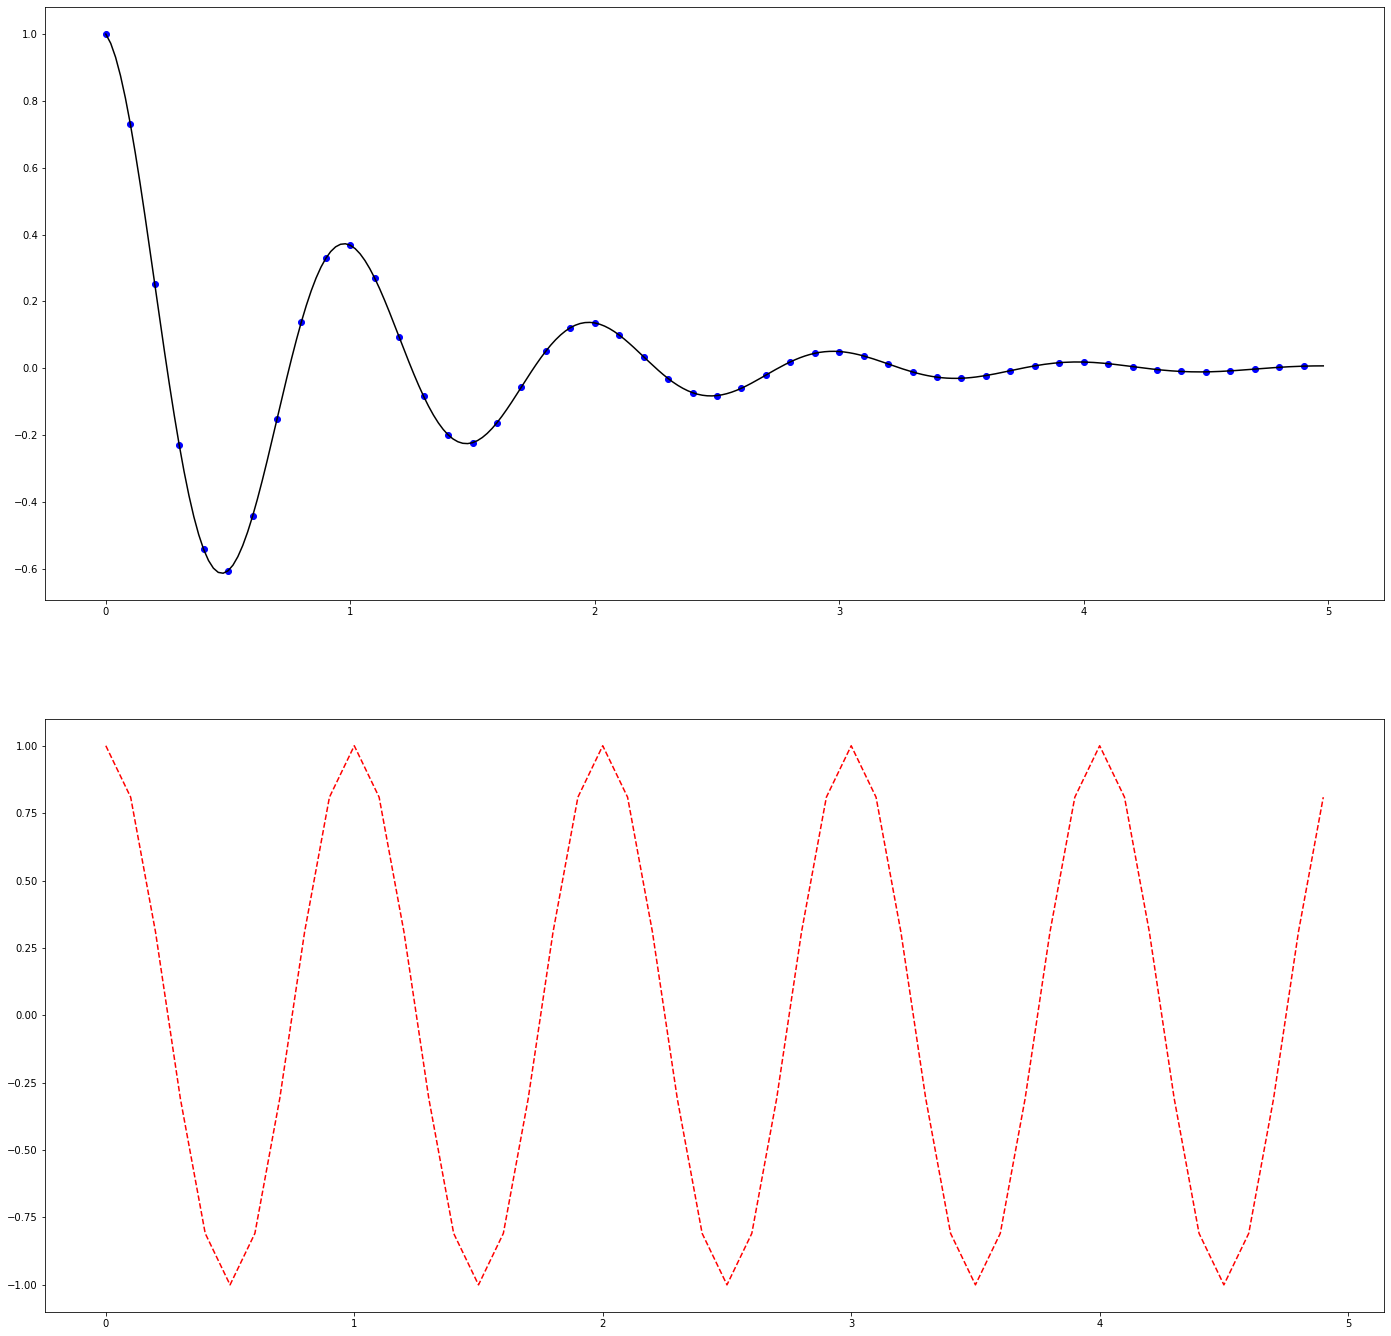

In [43]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(figsize=(24,24))
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k-')

plt.subplot(212)
plt.plot(t1, np.cos(2*np.pi*t1), 'r--')
plt.show()